In [1]:
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import os

In [2]:
rave_sim_dir = Path('/mnt/d/rave-sim-main/rave-sim-main')
simulations_dir = Path('/mnt/d/rave-sim-main/rave-sim-main/output')
scratch_dir = simulations_dir

In [3]:
sys.path.insert(0, str(rave_sim_dir / "big-wave"))
#print(str(rave_sim_dir / "big-wave"))
import multisim
import config
import util

In [4]:
config_dict = {
    "sim_params": {
        "N": 2**24,
        "dx": 3.1e-10,
        "z_detector": 4.6,
        "detector_size": 3e-3,
        "detector_pixel_size_x": 20e-6,
        "detector_pixel_size_y": 1,
        "chunk_size": 256 * 1024 * 1024 // 16,  # use 256MB chunks
    },
    "use_disk_vector": False,
    "save_final_u_vectors": False,
    "dtype": "c8",
    "multisource": {
        "type": "points",
        "energy_range": [10000, 50000],
        "x_range": [-3e-6, 3e-6],
        "z": 0.0,
        "nr_source_points": 100,
        "seed": 1,
        "spectrum": "/mnt/d/rave-sim-main/rave-sim-main/spectrum/spectrum_25keV.h5",
    },
    "elements": [
        {
            "type": "sample",
            "z_start": 0.8,
            "pixel_size_x": 5 * 1e-6,
            "pixel_size_z": 5 * 1e-6,
            "grid_path":"/mnt/d/rave-sim-main/rave-sim-main/grid/square_grid_020_1_5_5.npy",
            "materials": [["C", 1.3]],
            "x_positions":[1.46e-4],
        },
        {
            "type": "sample",
            "z_start": 0.81,
            "pixel_size_x": 5 * 1e-6,
            "pixel_size_z": 5 * 1e-6,
            "grid_path":"/mnt/d/rave-sim-main/rave-sim-main/grid/square_grid_020_1_5_5.npy",
            "materials": [["C", 1.3]],
            "x_positions":[1.5e-4],
        },
    ],
}

print("N: ", config_dict["sim_params"]["N"])

N:  16777216


In [5]:
sim_path = multisim.setup_simulation(config_dict, Path("."), simulations_dir)

2025-07-26 21:34:27,772 INFO: Setting up simulation
2025-07-26 21:34:28,777 INFO: Finished setting up simulation in /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159


In [6]:
computed = config.load(Path(sim_path / 'computed.yaml'))

#print("cutoff angles:", computed['cutoff_angles'])
#print("source points:", computed['source_points'])

In [7]:
# Run this in a for loop to simulate all source points or
# alternatively run the source points as individual euler
# jobs
#for i in range(20):
#    multisim.run_single_simulation(sim_path, i, scratch_dir, save_keypoints_path=scratch_dir)
for i in tqdm(range(config_dict["multisource"]["nr_source_points"])):
    os.system(f"CUDA_VISIBLE_DEVICES=0 /mnt/d/rave-sim-main/rave-sim-main/fast-wave/build-Release/fastwave -s {i} {sim_path}")

  0%|                                                                                           | 0/100 [00:00<?, ?it/s]

[2025-07-26 21:34:28.889] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000000
[2025-07-26 21:34:29.418] [info] Simulating optical element 1/2
[2025-07-26 21:34:31.785] [info] Elapsed time for optical element: 2367.1326 ms
[2025-07-26 21:34:31.790] [info] Simulating optical element 2/2


  1%|▊                                                                                  | 1/100 [00:05<08:49,  5.34s/it]

[2025-07-26 21:34:34.091] [info] Elapsed time for optical element: 2300.941 ms
[2025-07-26 21:34:34.106] [info] Simulation finished in 5.216570958 seconds
[2025-07-26 21:34:34.204] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000001
[2025-07-26 21:34:34.466] [info] Simulating optical element 1/2
[2025-07-26 21:34:36.765] [info] Elapsed time for optical element: 2299.7698 ms
[2025-07-26 21:34:36.770] [info] Simulating optical element 2/2


  2%|█▋                                                                                 | 2/100 [00:10<08:22,  5.13s/it]

[2025-07-26 21:34:39.072] [info] Elapsed time for optical element: 2301.4836 ms
[2025-07-26 21:34:39.087] [info] Simulation finished in 4.883309887 seconds
[2025-07-26 21:34:39.185] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000002
[2025-07-26 21:34:39.468] [info] Simulating optical element 1/2
[2025-07-26 21:34:41.762] [info] Elapsed time for optical element: 2293.9146 ms
[2025-07-26 21:34:41.767] [info] Simulating optical element 2/2


  3%|██▍                                                                                | 3/100 [00:15<08:11,  5.07s/it]

[2025-07-26 21:34:44.064] [info] Elapsed time for optical element: 2297.2852 ms
[2025-07-26 21:34:44.080] [info] Simulation finished in 4.894140773 seconds
[2025-07-26 21:34:44.170] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000003
[2025-07-26 21:34:44.441] [info] Simulating optical element 1/2
[2025-07-26 21:34:46.741] [info] Elapsed time for optical element: 2299.2903 ms
[2025-07-26 21:34:46.745] [info] Simulating optical element 2/2


  4%|███▎                                                                               | 4/100 [00:20<08:03,  5.04s/it]

[2025-07-26 21:34:49.045] [info] Elapsed time for optical element: 2298.8203 ms
[2025-07-26 21:34:49.061] [info] Simulation finished in 4.890333271 seconds
[2025-07-26 21:34:49.164] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000004
[2025-07-26 21:34:49.407] [info] Simulating optical element 1/2
[2025-07-26 21:34:51.705] [info] Elapsed time for optical element: 2298.027 ms
[2025-07-26 21:34:51.710] [info] Simulating optical element 2/2


  5%|████▏                                                                              | 5/100 [00:25<07:55,  5.01s/it]

[2025-07-26 21:34:54.008] [info] Elapsed time for optical element: 2298.3257 ms
[2025-07-26 21:34:54.024] [info] Simulation finished in 4.860051442 seconds
[2025-07-26 21:34:54.119] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000005
[2025-07-26 21:34:54.388] [info] Simulating optical element 1/2
[2025-07-26 21:34:56.745] [info] Elapsed time for optical element: 2356.7834 ms
[2025-07-26 21:34:56.750] [info] Simulating optical element 2/2


  6%|████▉                                                                              | 6/100 [00:30<07:52,  5.03s/it]

[2025-07-26 21:34:59.087] [info] Elapsed time for optical element: 2337.0693 ms
[2025-07-26 21:34:59.103] [info] Simulation finished in 4.983026674 seconds
[2025-07-26 21:34:59.195] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000006
[2025-07-26 21:34:59.455] [info] Simulating optical element 1/2
[2025-07-26 21:35:01.755] [info] Elapsed time for optical element: 2299.8818 ms
[2025-07-26 21:35:01.760] [info] Simulating optical element 2/2


  7%|█████▊                                                                             | 7/100 [00:35<07:46,  5.01s/it]

[2025-07-26 21:35:04.059] [info] Elapsed time for optical element: 2298.8513 ms
[2025-07-26 21:35:04.075] [info] Simulation finished in 4.880409178 seconds
[2025-07-26 21:35:04.170] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000007
[2025-07-26 21:35:04.461] [info] Simulating optical element 1/2
[2025-07-26 21:35:06.763] [info] Elapsed time for optical element: 2302.7078 ms
[2025-07-26 21:35:06.768] [info] Simulating optical element 2/2


  8%|██████▋                                                                            | 8/100 [00:40<07:41,  5.01s/it]

[2025-07-26 21:35:09.070] [info] Elapsed time for optical element: 2301.66 ms
[2025-07-26 21:35:09.086] [info] Simulation finished in 4.915869639 seconds
[2025-07-26 21:35:09.178] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000008
[2025-07-26 21:35:09.458] [info] Simulating optical element 1/2
[2025-07-26 21:35:11.759] [info] Elapsed time for optical element: 2301.0947 ms
[2025-07-26 21:35:11.764] [info] Simulating optical element 2/2


  9%|███████▍                                                                           | 9/100 [00:45<07:36,  5.01s/it]

[2025-07-26 21:35:14.066] [info] Elapsed time for optical element: 2301.2505 ms
[2025-07-26 21:35:14.082] [info] Simulation finished in 4.90405301 seconds
[2025-07-26 21:35:14.195] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000009
[2025-07-26 21:35:14.454] [info] Simulating optical element 1/2
[2025-07-26 21:35:16.761] [info] Elapsed time for optical element: 2307.165 ms
[2025-07-26 21:35:16.766] [info] Simulating optical element 2/2


 10%|████████▏                                                                         | 10/100 [00:50<07:30,  5.01s/it]

[2025-07-26 21:35:19.072] [info] Elapsed time for optical element: 2306.1868 ms
[2025-07-26 21:35:19.088] [info] Simulation finished in 4.892956378 seconds
[2025-07-26 21:35:19.193] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000010
[2025-07-26 21:35:19.460] [info] Simulating optical element 1/2
[2025-07-26 21:35:21.766] [info] Elapsed time for optical element: 2305.228 ms
[2025-07-26 21:35:21.771] [info] Simulating optical element 2/2


 11%|█████████                                                                         | 11/100 [00:55<07:25,  5.01s/it]

[2025-07-26 21:35:24.075] [info] Elapsed time for optical element: 2304.641 ms
[2025-07-26 21:35:24.092] [info] Simulation finished in 4.898273712 seconds
[2025-07-26 21:35:24.196] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000011
[2025-07-26 21:35:24.454] [info] Simulating optical element 1/2
[2025-07-26 21:35:26.764] [info] Elapsed time for optical element: 2308.9543 ms
[2025-07-26 21:35:26.768] [info] Simulating optical element 2/2


 12%|█████████▊                                                                        | 12/100 [01:00<07:20,  5.00s/it]

[2025-07-26 21:35:29.077] [info] Elapsed time for optical element: 2308.8948 ms
[2025-07-26 21:35:29.093] [info] Simulation finished in 4.897634309 seconds
[2025-07-26 21:35:29.193] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000012
[2025-07-26 21:35:29.478] [info] Simulating optical element 1/2
[2025-07-26 21:35:31.781] [info] Elapsed time for optical element: 2303.0854 ms
[2025-07-26 21:35:31.786] [info] Simulating optical element 2/2


 13%|██████████▋                                                                       | 13/100 [01:05<07:15,  5.00s/it]

[2025-07-26 21:35:34.089] [info] Elapsed time for optical element: 2303.2947 ms
[2025-07-26 21:35:34.105] [info] Simulation finished in 4.912127608 seconds
[2025-07-26 21:35:34.197] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000013
[2025-07-26 21:35:34.440] [info] Simulating optical element 1/2
[2025-07-26 21:35:36.752] [info] Elapsed time for optical element: 2311.0745 ms
[2025-07-26 21:35:36.757] [info] Simulating optical element 2/2


 14%|███████████▍                                                                      | 14/100 [01:10<07:10,  5.00s/it]

[2025-07-26 21:35:39.068] [info] Elapsed time for optical element: 2311.0095 ms
[2025-07-26 21:35:39.084] [info] Simulation finished in 4.887348532 seconds
[2025-07-26 21:35:39.194] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000014
[2025-07-26 21:35:39.462] [info] Simulating optical element 1/2
[2025-07-26 21:35:41.763] [info] Elapsed time for optical element: 2301.6013 ms
[2025-07-26 21:35:41.768] [info] Simulating optical element 2/2


 15%|████████████▎                                                                     | 15/100 [01:15<07:05,  5.00s/it]

[2025-07-26 21:35:44.069] [info] Elapsed time for optical element: 2300.7795 ms
[2025-07-26 21:35:44.085] [info] Simulation finished in 4.890008094 seconds
[2025-07-26 21:35:44.194] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000015
[2025-07-26 21:35:44.461] [info] Simulating optical element 1/2
[2025-07-26 21:35:46.767] [info] Elapsed time for optical element: 2305.9685 ms
[2025-07-26 21:35:46.772] [info] Simulating optical element 2/2


 16%|█████████████                                                                     | 16/100 [01:20<07:00,  5.00s/it]

[2025-07-26 21:35:49.078] [info] Elapsed time for optical element: 2305.513 ms
[2025-07-26 21:35:49.093] [info] Simulation finished in 4.899356817 seconds
[2025-07-26 21:35:49.194] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000016
[2025-07-26 21:35:49.462] [info] Simulating optical element 1/2
[2025-07-26 21:35:51.765] [info] Elapsed time for optical element: 2302.5342 ms
[2025-07-26 21:35:51.769] [info] Simulating optical element 2/2


 17%|█████████████▉                                                                    | 17/100 [01:25<06:54,  5.00s/it]

[2025-07-26 21:35:54.071] [info] Elapsed time for optical element: 2301.7583 ms
[2025-07-26 21:35:54.088] [info] Simulation finished in 4.893847615 seconds
[2025-07-26 21:35:54.190] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000017
[2025-07-26 21:35:54.464] [info] Simulating optical element 1/2
[2025-07-26 21:35:56.768] [info] Elapsed time for optical element: 2303.9644 ms
[2025-07-26 21:35:56.773] [info] Simulating optical element 2/2


 18%|██████████████▊                                                                   | 18/100 [01:30<06:50,  5.00s/it]

[2025-07-26 21:35:59.077] [info] Elapsed time for optical element: 2303.6953 ms
[2025-07-26 21:35:59.093] [info] Simulation finished in 4.902304 seconds
[2025-07-26 21:35:59.199] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000018
[2025-07-26 21:35:59.471] [info] Simulating optical element 1/2
[2025-07-26 21:36:01.774] [info] Elapsed time for optical element: 2303.123 ms
[2025-07-26 21:36:01.779] [info] Simulating optical element 2/2


 19%|███████████████▌                                                                  | 19/100 [01:35<06:45,  5.00s/it]

[2025-07-26 21:36:04.081] [info] Elapsed time for optical element: 2301.6616 ms
[2025-07-26 21:36:04.097] [info] Simulation finished in 4.898281509 seconds
[2025-07-26 21:36:04.207] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000019
[2025-07-26 21:36:04.462] [info] Simulating optical element 1/2
[2025-07-26 21:36:06.764] [info] Elapsed time for optical element: 2301.7764 ms
[2025-07-26 21:36:06.769] [info] Simulating optical element 2/2


 20%|████████████████▍                                                                 | 20/100 [01:40<06:39,  5.00s/it]

[2025-07-26 21:36:09.071] [info] Elapsed time for optical element: 2301.368 ms
[2025-07-26 21:36:09.087] [info] Simulation finished in 4.880557269 seconds
[2025-07-26 21:36:09.180] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000020
[2025-07-26 21:36:09.456] [info] Simulating optical element 1/2
[2025-07-26 21:36:11.765] [info] Elapsed time for optical element: 2309.3477 ms
[2025-07-26 21:36:11.770] [info] Simulating optical element 2/2


 21%|█████████████████▏                                                                | 21/100 [01:45<06:34,  5.00s/it]

[2025-07-26 21:36:14.079] [info] Elapsed time for optical element: 2308.8367 ms
[2025-07-26 21:36:14.095] [info] Simulation finished in 4.914998947 seconds
[2025-07-26 21:36:14.185] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000021
[2025-07-26 21:36:14.440] [info] Simulating optical element 1/2
[2025-07-26 21:36:16.752] [info] Elapsed time for optical element: 2311.8718 ms
[2025-07-26 21:36:16.757] [info] Simulating optical element 2/2


 22%|██████████████████                                                                | 22/100 [01:50<06:29,  5.00s/it]

[2025-07-26 21:36:19.069] [info] Elapsed time for optical element: 2312.2686 ms
[2025-07-26 21:36:19.088] [info] Simulation finished in 4.902482076 seconds
[2025-07-26 21:36:19.182] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000022
[2025-07-26 21:36:19.428] [info] Simulating optical element 1/2
[2025-07-26 21:36:21.728] [info] Elapsed time for optical element: 2300.0251 ms
[2025-07-26 21:36:21.733] [info] Simulating optical element 2/2


 23%|██████████████████▊                                                               | 23/100 [01:55<06:23,  4.99s/it]

[2025-07-26 21:36:24.033] [info] Elapsed time for optical element: 2299.271 ms
[2025-07-26 21:36:24.048] [info] Simulation finished in 4.866278012 seconds
[2025-07-26 21:36:24.139] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000023
[2025-07-26 21:36:24.414] [info] Simulating optical element 1/2
[2025-07-26 21:36:26.720] [info] Elapsed time for optical element: 2305.5073 ms
[2025-07-26 21:36:26.725] [info] Simulating optical element 2/2


 24%|███████████████████▋                                                              | 24/100 [02:00<06:19,  4.99s/it]

[2025-07-26 21:36:29.029] [info] Elapsed time for optical element: 2304.2852 ms
[2025-07-26 21:36:29.045] [info] Simulation finished in 4.905629596 seconds
[2025-07-26 21:36:29.134] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000024
[2025-07-26 21:36:29.393] [info] Simulating optical element 1/2
[2025-07-26 21:36:31.701] [info] Elapsed time for optical element: 2307.6611 ms
[2025-07-26 21:36:31.706] [info] Simulating optical element 2/2


 25%|████████████████████▌                                                             | 25/100 [02:05<06:14,  4.99s/it]

[2025-07-26 21:36:34.015] [info] Elapsed time for optical element: 2308.6418 ms
[2025-07-26 21:36:34.032] [info] Simulation finished in 4.89768039 seconds
[2025-07-26 21:36:34.128] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000025
[2025-07-26 21:36:34.436] [info] Simulating optical element 1/2
[2025-07-26 21:36:36.745] [info] Elapsed time for optical element: 2308.5737 ms
[2025-07-26 21:36:36.750] [info] Simulating optical element 2/2


 26%|█████████████████████▎                                                            | 26/100 [02:10<06:10,  5.00s/it]

[2025-07-26 21:36:39.057] [info] Elapsed time for optical element: 2307.4285 ms
[2025-07-26 21:36:39.076] [info] Simulation finished in 4.947982041 seconds
[2025-07-26 21:36:39.165] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000026
[2025-07-26 21:36:39.408] [info] Simulating optical element 1/2
[2025-07-26 21:36:41.706] [info] Elapsed time for optical element: 2298.4426 ms
[2025-07-26 21:36:41.711] [info] Simulating optical element 2/2


 27%|██████████████████████▏                                                           | 27/100 [02:15<06:04,  4.99s/it]

[2025-07-26 21:36:44.011] [info] Elapsed time for optical element: 2299.5723 ms
[2025-07-26 21:36:44.027] [info] Simulation finished in 4.861270112 seconds
[2025-07-26 21:36:44.118] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000027
[2025-07-26 21:36:44.429] [info] Simulating optical element 1/2
[2025-07-26 21:36:46.728] [info] Elapsed time for optical element: 2298.9932 ms
[2025-07-26 21:36:46.733] [info] Simulating optical element 2/2


 28%|██████████████████████▉                                                           | 28/100 [02:20<05:59,  5.00s/it]

[2025-07-26 21:36:49.033] [info] Elapsed time for optical element: 2299.6526 ms
[2025-07-26 21:36:49.048] [info] Simulation finished in 4.930170458 seconds
[2025-07-26 21:36:49.139] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000028
[2025-07-26 21:36:49.405] [info] Simulating optical element 1/2
[2025-07-26 21:36:51.705] [info] Elapsed time for optical element: 2299.7698 ms
[2025-07-26 21:36:51.710] [info] Simulating optical element 2/2


 29%|███████████████████████▊                                                          | 29/100 [02:25<05:54,  4.99s/it]

[2025-07-26 21:36:54.009] [info] Elapsed time for optical element: 2298.4426 ms
[2025-07-26 21:36:54.025] [info] Simulation finished in 4.885096714 seconds
[2025-07-26 21:36:54.119] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000029
[2025-07-26 21:36:54.418] [info] Simulating optical element 1/2
[2025-07-26 21:36:56.726] [info] Elapsed time for optical element: 2307.732 ms
[2025-07-26 21:36:56.731] [info] Simulating optical element 2/2


 30%|████████████████████████▌                                                         | 30/100 [02:30<05:50,  5.00s/it]

[2025-07-26 21:36:59.038] [info] Elapsed time for optical element: 2306.8555 ms
[2025-07-26 21:36:59.054] [info] Simulation finished in 4.934970475 seconds
[2025-07-26 21:36:59.150] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000030
[2025-07-26 21:36:59.448] [info] Simulating optical element 1/2
[2025-07-26 21:37:01.749] [info] Elapsed time for optical element: 2300.482 ms
[2025-07-26 21:37:01.754] [info] Simulating optical element 2/2


 31%|█████████████████████████▍                                                        | 31/100 [02:35<05:45,  5.01s/it]

[2025-07-26 21:37:04.054] [info] Elapsed time for optical element: 2300.0938 ms
[2025-07-26 21:37:04.070] [info] Simulation finished in 4.919430026 seconds
[2025-07-26 21:37:04.164] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000031
[2025-07-26 21:37:04.413] [info] Simulating optical element 1/2
[2025-07-26 21:37:06.716] [info] Elapsed time for optical element: 2303.0786 ms
[2025-07-26 21:37:06.721] [info] Simulating optical element 2/2


 32%|██████████████████████████▏                                                       | 32/100 [02:40<05:39,  5.00s/it]

[2025-07-26 21:37:09.025] [info] Elapsed time for optical element: 2303.7415 ms
[2025-07-26 21:37:09.041] [info] Simulation finished in 4.877253074 seconds
[2025-07-26 21:37:09.131] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000032
[2025-07-26 21:37:09.398] [info] Simulating optical element 1/2
[2025-07-26 21:37:11.709] [info] Elapsed time for optical element: 2311.3782 ms
[2025-07-26 21:37:11.714] [info] Simulating optical element 2/2


 33%|███████████████████████████                                                       | 33/100 [02:45<05:34,  5.00s/it]

[2025-07-26 21:37:14.025] [info] Elapsed time for optical element: 2311.035 ms
[2025-07-26 21:37:14.041] [info] Simulation finished in 4.910171881 seconds
[2025-07-26 21:37:14.134] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000033
[2025-07-26 21:37:14.410] [info] Simulating optical element 1/2
[2025-07-26 21:37:16.714] [info] Elapsed time for optical element: 2303.6091 ms
[2025-07-26 21:37:16.718] [info] Simulating optical element 2/2


 34%|███████████████████████████▉                                                      | 34/100 [02:50<05:29,  5.00s/it]

[2025-07-26 21:37:19.024] [info] Elapsed time for optical element: 2304.945 ms
[2025-07-26 21:37:19.042] [info] Simulation finished in 4.907597627 seconds
[2025-07-26 21:37:19.137] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000034
[2025-07-26 21:37:19.389] [info] Simulating optical element 1/2
[2025-07-26 21:37:21.697] [info] Elapsed time for optical element: 2307.4075 ms
[2025-07-26 21:37:21.701] [info] Simulating optical element 2/2


 35%|████████████████████████████▋                                                     | 35/100 [02:55<05:24,  4.99s/it]

[2025-07-26 21:37:24.009] [info] Elapsed time for optical element: 2307.1875 ms
[2025-07-26 21:37:24.024] [info] Simulation finished in 4.88661394 seconds
[2025-07-26 21:37:24.118] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000035
[2025-07-26 21:37:24.383] [info] Simulating optical element 1/2
[2025-07-26 21:37:26.683] [info] Elapsed time for optical element: 2300.2705 ms
[2025-07-26 21:37:26.689] [info] Simulating optical element 2/2


 36%|█████████████████████████████▌                                                    | 36/100 [03:00<05:19,  4.99s/it]

[2025-07-26 21:37:28.990] [info] Elapsed time for optical element: 2301.2966 ms
[2025-07-26 21:37:29.006] [info] Simulation finished in 4.888068761 seconds
[2025-07-26 21:37:29.100] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000036
[2025-07-26 21:37:29.360] [info] Simulating optical element 1/2
[2025-07-26 21:37:31.667] [info] Elapsed time for optical element: 2306.9106 ms
[2025-07-26 21:37:31.672] [info] Simulating optical element 2/2


 37%|██████████████████████████████▎                                                   | 37/100 [03:05<05:14,  4.99s/it]

[2025-07-26 21:37:33.982] [info] Elapsed time for optical element: 2309.5195 ms
[2025-07-26 21:37:33.997] [info] Simulation finished in 4.897074493 seconds
[2025-07-26 21:37:34.092] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000037
[2025-07-26 21:37:34.365] [info] Simulating optical element 1/2
[2025-07-26 21:37:36.675] [info] Elapsed time for optical element: 2309.0815 ms
[2025-07-26 21:37:36.680] [info] Simulating optical element 2/2


 38%|███████████████████████████████▏                                                  | 38/100 [03:10<05:10,  5.01s/it]

[2025-07-26 21:37:38.989] [info] Elapsed time for optical element: 2308.9622 ms
[2025-07-26 21:37:39.044] [info] Simulation finished in 4.952254545 seconds
[2025-07-26 21:37:39.141] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000038
[2025-07-26 21:37:39.414] [info] Simulating optical element 1/2
[2025-07-26 21:37:41.712] [info] Elapsed time for optical element: 2298.2947 ms
[2025-07-26 21:37:41.717] [info] Simulating optical element 2/2


 39%|███████████████████████████████▉                                                  | 39/100 [03:15<05:05,  5.00s/it]

[2025-07-26 21:37:44.015] [info] Elapsed time for optical element: 2297.5217 ms
[2025-07-26 21:37:44.031] [info] Simulation finished in 4.88988447 seconds
[2025-07-26 21:37:44.127] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000039
[2025-07-26 21:37:44.379] [info] Simulating optical element 1/2
[2025-07-26 21:37:46.686] [info] Elapsed time for optical element: 2307.4893 ms
[2025-07-26 21:37:46.691] [info] Simulating optical element 2/2


 40%|████████████████████████████████▊                                                 | 40/100 [03:20<04:59,  5.00s/it]

[2025-07-26 21:37:48.999] [info] Elapsed time for optical element: 2308.0344 ms
[2025-07-26 21:37:49.015] [info] Simulation finished in 4.888584528 seconds
[2025-07-26 21:37:49.111] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000040
[2025-07-26 21:37:49.396] [info] Simulating optical element 1/2
[2025-07-26 21:37:51.706] [info] Elapsed time for optical element: 2310.5437 ms
[2025-07-26 21:37:51.711] [info] Simulating optical element 2/2


 41%|█████████████████████████████████▌                                                | 41/100 [03:25<04:55,  5.00s/it]

[2025-07-26 21:37:54.024] [info] Elapsed time for optical element: 2312.5154 ms
[2025-07-26 21:37:54.040] [info] Simulation finished in 4.928511145 seconds
[2025-07-26 21:37:54.131] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000041
[2025-07-26 21:37:54.382] [info] Simulating optical element 1/2
[2025-07-26 21:37:56.690] [info] Elapsed time for optical element: 2307.6401 ms
[2025-07-26 21:37:56.695] [info] Simulating optical element 2/2


 42%|██████████████████████████████████▍                                               | 42/100 [03:30<04:49,  5.00s/it]

[2025-07-26 21:37:59.002] [info] Elapsed time for optical element: 2307.7334 ms
[2025-07-26 21:37:59.018] [info] Simulation finished in 4.887400603 seconds
[2025-07-26 21:37:59.120] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000042
[2025-07-26 21:37:59.370] [info] Simulating optical element 1/2
[2025-07-26 21:38:01.672] [info] Elapsed time for optical element: 2302.3909 ms
[2025-07-26 21:38:01.677] [info] Simulating optical element 2/2


 43%|███████████████████████████████████▎                                              | 43/100 [03:35<04:44,  4.99s/it]

[2025-07-26 21:38:03.979] [info] Elapsed time for optical element: 2301.9233 ms
[2025-07-26 21:38:03.995] [info] Simulation finished in 4.875009104 seconds
[2025-07-26 21:38:04.093] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000043
[2025-07-26 21:38:04.372] [info] Simulating optical element 1/2
[2025-07-26 21:38:06.679] [info] Elapsed time for optical element: 2306.7134 ms
[2025-07-26 21:38:06.684] [info] Simulating optical element 2/2


 44%|████████████████████████████████████                                              | 44/100 [03:40<04:39,  5.00s/it]

[2025-07-26 21:38:08.992] [info] Elapsed time for optical element: 2308.4478 ms
[2025-07-26 21:38:09.008] [info] Simulation finished in 4.915245512 seconds
[2025-07-26 21:38:09.103] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000044
[2025-07-26 21:38:09.409] [info] Simulating optical element 1/2
[2025-07-26 21:38:11.709] [info] Elapsed time for optical element: 2300.1887 ms
[2025-07-26 21:38:11.714] [info] Simulating optical element 2/2


 45%|████████████████████████████████████▉                                             | 45/100 [03:45<04:35,  5.00s/it]

[2025-07-26 21:38:14.014] [info] Elapsed time for optical element: 2300.2422 ms
[2025-07-26 21:38:14.030] [info] Simulation finished in 4.927237554 seconds
[2025-07-26 21:38:14.125] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000045
[2025-07-26 21:38:14.409] [info] Simulating optical element 1/2
[2025-07-26 21:38:16.713] [info] Elapsed time for optical element: 2304.1194 ms
[2025-07-26 21:38:16.718] [info] Simulating optical element 2/2


 46%|█████████████████████████████████████▋                                            | 46/100 [03:50<04:30,  5.00s/it]

[2025-07-26 21:38:19.023] [info] Elapsed time for optical element: 2305.1514 ms
[2025-07-26 21:38:19.039] [info] Simulation finished in 4.914398362 seconds
[2025-07-26 21:38:19.129] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000046
[2025-07-26 21:38:19.408] [info] Simulating optical element 1/2
[2025-07-26 21:38:21.719] [info] Elapsed time for optical element: 2310.2996 ms
[2025-07-26 21:38:21.724] [info] Simulating optical element 2/2


 47%|██████████████████████████████████████▌                                           | 47/100 [03:55<04:25,  5.01s/it]

[2025-07-26 21:38:24.034] [info] Elapsed time for optical element: 2310.4746 ms
[2025-07-26 21:38:24.050] [info] Simulation finished in 4.920829545 seconds
[2025-07-26 21:38:24.146] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000047
[2025-07-26 21:38:24.410] [info] Simulating optical element 1/2
[2025-07-26 21:38:26.712] [info] Elapsed time for optical element: 2301.6587 ms
[2025-07-26 21:38:26.717] [info] Simulating optical element 2/2


 48%|███████████████████████████████████████▎                                          | 48/100 [04:00<04:20,  5.00s/it]

[2025-07-26 21:38:29.019] [info] Elapsed time for optical element: 2302.0054 ms
[2025-07-26 21:38:29.035] [info] Simulation finished in 4.888807478 seconds
[2025-07-26 21:38:29.131] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000048
[2025-07-26 21:38:29.425] [info] Simulating optical element 1/2
[2025-07-26 21:38:31.727] [info] Elapsed time for optical element: 2301.6064 ms
[2025-07-26 21:38:31.732] [info] Simulating optical element 2/2


 49%|████████████████████████████████████████▏                                         | 49/100 [04:05<04:15,  5.00s/it]

[2025-07-26 21:38:34.034] [info] Elapsed time for optical element: 2301.5354 ms
[2025-07-26 21:38:34.050] [info] Simulation finished in 4.919435896 seconds
[2025-07-26 21:38:34.141] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000049
[2025-07-26 21:38:34.389] [info] Simulating optical element 1/2
[2025-07-26 21:38:36.690] [info] Elapsed time for optical element: 2300.7048 ms
[2025-07-26 21:38:36.695] [info] Simulating optical element 2/2


 50%|█████████████████████████████████████████                                         | 50/100 [04:10<04:09,  4.99s/it]

[2025-07-26 21:38:38.996] [info] Elapsed time for optical element: 2300.4558 ms
[2025-07-26 21:38:39.014] [info] Simulation finished in 4.872140416 seconds
[2025-07-26 21:38:39.109] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000050
[2025-07-26 21:38:39.368] [info] Simulating optical element 1/2
[2025-07-26 21:38:41.668] [info] Elapsed time for optical element: 2299.473 ms
[2025-07-26 21:38:41.673] [info] Simulating optical element 2/2


 51%|█████████████████████████████████████████▊                                        | 51/100 [04:15<04:04,  4.99s/it]

[2025-07-26 21:38:43.973] [info] Elapsed time for optical element: 2299.9023 ms
[2025-07-26 21:38:43.989] [info] Simulation finished in 4.879563857 seconds
[2025-07-26 21:38:44.081] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000051
[2025-07-26 21:38:44.343] [info] Simulating optical element 1/2
[2025-07-26 21:38:46.651] [info] Elapsed time for optical element: 2307.145 ms
[2025-07-26 21:38:46.656] [info] Simulating optical element 2/2


 52%|██████████████████████████████████████████▋                                       | 52/100 [04:20<03:59,  4.99s/it]

[2025-07-26 21:38:48.963] [info] Elapsed time for optical element: 2306.946 ms
[2025-07-26 21:38:48.978] [info] Simulation finished in 4.89730627 seconds
[2025-07-26 21:38:49.070] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000052
[2025-07-26 21:38:49.323] [info] Simulating optical element 1/2
[2025-07-26 21:38:51.624] [info] Elapsed time for optical element: 2301.0107 ms
[2025-07-26 21:38:51.629] [info] Simulating optical element 2/2


 53%|███████████████████████████████████████████▍                                      | 53/100 [04:25<03:54,  4.98s/it]

[2025-07-26 21:38:53.930] [info] Elapsed time for optical element: 2301.1895 ms
[2025-07-26 21:38:53.945] [info] Simulation finished in 4.875318427 seconds
[2025-07-26 21:38:54.042] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000053
[2025-07-26 21:38:54.336] [info] Simulating optical element 1/2
[2025-07-26 21:38:56.639] [info] Elapsed time for optical element: 2302.8694 ms
[2025-07-26 21:38:56.644] [info] Simulating optical element 2/2


 54%|████████████████████████████████████████████▎                                     | 54/100 [04:30<03:49,  4.99s/it]

[2025-07-26 21:38:58.946] [info] Elapsed time for optical element: 2302.32 ms
[2025-07-26 21:38:58.963] [info] Simulation finished in 4.921154729 seconds
[2025-07-26 21:38:59.061] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000054
[2025-07-26 21:38:59.343] [info] Simulating optical element 1/2
[2025-07-26 21:39:01.648] [info] Elapsed time for optical element: 2304.2478 ms
[2025-07-26 21:39:01.653] [info] Simulating optical element 2/2


 55%|█████████████████████████████████████████████                                     | 55/100 [04:35<03:44,  5.00s/it]

[2025-07-26 21:39:03.957] [info] Elapsed time for optical element: 2303.7874 ms
[2025-07-26 21:39:03.972] [info] Simulation finished in 4.911297318 seconds
[2025-07-26 21:39:04.066] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000055
[2025-07-26 21:39:04.350] [info] Simulating optical element 1/2
[2025-07-26 21:39:06.650] [info] Elapsed time for optical element: 2300.3809 ms
[2025-07-26 21:39:06.655] [info] Simulating optical element 2/2


 56%|█████████████████████████████████████████████▉                                    | 56/100 [04:40<03:39,  5.00s/it]

[2025-07-26 21:39:08.956] [info] Elapsed time for optical element: 2300.0486 ms
[2025-07-26 21:39:08.972] [info] Simulation finished in 4.905389396 seconds
[2025-07-26 21:39:09.065] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000056
[2025-07-26 21:39:09.324] [info] Simulating optical element 1/2
[2025-07-26 21:39:11.629] [info] Elapsed time for optical element: 2305.0625 ms
[2025-07-26 21:39:11.634] [info] Simulating optical element 2/2


 57%|██████████████████████████████████████████████▋                                   | 57/100 [04:45<03:34,  4.99s/it]

[2025-07-26 21:39:13.939] [info] Elapsed time for optical element: 2305.1733 ms
[2025-07-26 21:39:13.955] [info] Simulation finished in 4.889510693 seconds
[2025-07-26 21:39:14.050] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000057
[2025-07-26 21:39:14.304] [info] Simulating optical element 1/2
[2025-07-26 21:39:16.605] [info] Elapsed time for optical element: 2301.0847 ms
[2025-07-26 21:39:16.610] [info] Simulating optical element 2/2


 58%|███████████████████████████████████████████████▌                                  | 58/100 [04:50<03:29,  4.99s/it]

[2025-07-26 21:39:18.911] [info] Elapsed time for optical element: 2301.73 ms
[2025-07-26 21:39:18.929] [info] Simulation finished in 4.879674747 seconds
[2025-07-26 21:39:19.022] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000058
[2025-07-26 21:39:19.286] [info] Simulating optical element 1/2
[2025-07-26 21:39:21.592] [info] Elapsed time for optical element: 2305.62 ms
[2025-07-26 21:39:21.597] [info] Simulating optical element 2/2


 59%|████████████████████████████████████████████████▍                                 | 59/100 [04:55<03:24,  4.99s/it]

[2025-07-26 21:39:23.903] [info] Elapsed time for optical element: 2306.008 ms
[2025-07-26 21:39:23.919] [info] Simulation finished in 4.897020306 seconds
[2025-07-26 21:39:24.015] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000059
[2025-07-26 21:39:24.309] [info] Simulating optical element 1/2
[2025-07-26 21:39:26.616] [info] Elapsed time for optical element: 2306.9482 ms
[2025-07-26 21:39:26.621] [info] Simulating optical element 2/2


 60%|█████████████████████████████████████████████████▏                                | 60/100 [05:00<03:19,  5.00s/it]

[2025-07-26 21:39:28.928] [info] Elapsed time for optical element: 2307.297 ms
[2025-07-26 21:39:28.944] [info] Simulation finished in 4.928931342 seconds
[2025-07-26 21:39:29.035] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000060
[2025-07-26 21:39:29.330] [info] Simulating optical element 1/2
[2025-07-26 21:39:31.630] [info] Elapsed time for optical element: 2300.3071 ms
[2025-07-26 21:39:31.635] [info] Simulating optical element 2/2


 61%|██████████████████████████████████████████████████                                | 61/100 [05:05<03:15,  5.00s/it]

[2025-07-26 21:39:33.936] [info] Elapsed time for optical element: 2300.186 ms
[2025-07-26 21:39:33.951] [info] Simulation finished in 4.915615595 seconds
[2025-07-26 21:39:34.044] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000061
[2025-07-26 21:39:34.294] [info] Simulating optical element 1/2
[2025-07-26 21:39:36.598] [info] Elapsed time for optical element: 2303.4622 ms
[2025-07-26 21:39:36.603] [info] Simulating optical element 2/2


 62%|██████████████████████████████████████████████████▊                               | 62/100 [05:10<03:09,  4.99s/it]

[2025-07-26 21:39:38.907] [info] Elapsed time for optical element: 2303.6409 ms
[2025-07-26 21:39:38.923] [info] Simulation finished in 4.878812759 seconds
[2025-07-26 21:39:39.016] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000062
[2025-07-26 21:39:39.274] [info] Simulating optical element 1/2
[2025-07-26 21:39:41.581] [info] Elapsed time for optical element: 2307.4875 ms
[2025-07-26 21:39:41.586] [info] Simulating optical element 2/2


 63%|███████████████████████████████████████████████████▋                              | 63/100 [05:15<03:04,  4.99s/it]

[2025-07-26 21:39:43.893] [info] Elapsed time for optical element: 2307 ms
[2025-07-26 21:39:43.909] [info] Simulation finished in 4.893221601 seconds
[2025-07-26 21:39:44.003] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000063
[2025-07-26 21:39:44.252] [info] Simulating optical element 1/2
[2025-07-26 21:39:46.555] [info] Elapsed time for optical element: 2303.468 ms
[2025-07-26 21:39:46.560] [info] Simulating optical element 2/2


 64%|████████████████████████████████████████████████████▍                             | 64/100 [05:20<02:59,  4.99s/it]

[2025-07-26 21:39:48.864] [info] Elapsed time for optical element: 2303.2786 ms
[2025-07-26 21:39:48.880] [info] Simulation finished in 4.876731252 seconds
[2025-07-26 21:39:48.999] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000064
[2025-07-26 21:39:49.298] [info] Simulating optical element 1/2
[2025-07-26 21:39:51.599] [info] Elapsed time for optical element: 2300.3945 ms
[2025-07-26 21:39:51.604] [info] Simulating optical element 2/2


 65%|█████████████████████████████████████████████████████▎                            | 65/100 [05:25<02:55,  5.02s/it]

[2025-07-26 21:39:53.956] [info] Elapsed time for optical element: 2351.999 ms
[2025-07-26 21:39:53.973] [info] Simulation finished in 4.973024886 seconds
[2025-07-26 21:39:54.072] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000065
[2025-07-26 21:39:54.334] [info] Simulating optical element 1/2
[2025-07-26 21:39:56.623] [info] Elapsed time for optical element: 2288.7258 ms
[2025-07-26 21:39:56.628] [info] Simulating optical element 2/2


 66%|██████████████████████████████████████████████████████                            | 66/100 [05:30<02:50,  5.00s/it]

[2025-07-26 21:39:58.931] [info] Elapsed time for optical element: 2303.1704 ms
[2025-07-26 21:39:58.949] [info] Simulation finished in 4.877154105 seconds
[2025-07-26 21:39:59.045] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000066
[2025-07-26 21:39:59.295] [info] Simulating optical element 1/2
[2025-07-26 21:40:01.586] [info] Elapsed time for optical element: 2290.8271 ms
[2025-07-26 21:40:01.591] [info] Simulating optical element 2/2


 67%|██████████████████████████████████████████████████████▉                           | 67/100 [05:35<02:44,  4.99s/it]

[2025-07-26 21:40:03.883] [info] Elapsed time for optical element: 2291.9731 ms
[2025-07-26 21:40:03.898] [info] Simulation finished in 4.853850767 seconds
[2025-07-26 21:40:04.009] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000067
[2025-07-26 21:40:04.256] [info] Simulating optical element 1/2
[2025-07-26 21:40:06.548] [info] Elapsed time for optical element: 2291.2317 ms
[2025-07-26 21:40:06.552] [info] Simulating optical element 2/2


 68%|███████████████████████████████████████████████████████▊                          | 68/100 [05:40<02:39,  4.98s/it]

[2025-07-26 21:40:08.841] [info] Elapsed time for optical element: 2288.091 ms
[2025-07-26 21:40:08.857] [info] Simulation finished in 4.848398312 seconds
[2025-07-26 21:40:08.950] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000068
[2025-07-26 21:40:09.214] [info] Simulating optical element 1/2
[2025-07-26 21:40:11.509] [info] Elapsed time for optical element: 2294.4907 ms
[2025-07-26 21:40:11.514] [info] Simulating optical element 2/2


 69%|████████████████████████████████████████████████████████▌                         | 69/100 [05:45<02:34,  4.97s/it]

[2025-07-26 21:40:13.809] [info] Elapsed time for optical element: 2294.9158 ms
[2025-07-26 21:40:13.825] [info] Simulation finished in 4.875275362 seconds
[2025-07-26 21:40:13.918] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000069
[2025-07-26 21:40:14.206] [info] Simulating optical element 1/2
[2025-07-26 21:40:16.495] [info] Elapsed time for optical element: 2288.2278 ms
[2025-07-26 21:40:16.500] [info] Simulating optical element 2/2


 70%|█████████████████████████████████████████████████████████▍                        | 70/100 [05:50<02:29,  4.98s/it]

[2025-07-26 21:40:18.789] [info] Elapsed time for optical element: 2288.9607 ms
[2025-07-26 21:40:18.805] [info] Simulation finished in 4.886787893 seconds
[2025-07-26 21:40:18.898] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000070
[2025-07-26 21:40:19.146] [info] Simulating optical element 1/2
[2025-07-26 21:40:21.439] [info] Elapsed time for optical element: 2292.7544 ms
[2025-07-26 21:40:21.444] [info] Simulating optical element 2/2


 71%|██████████████████████████████████████████████████████████▏                       | 71/100 [05:54<02:24,  4.97s/it]

[2025-07-26 21:40:23.738] [info] Elapsed time for optical element: 2293.239 ms
[2025-07-26 21:40:23.754] [info] Simulation finished in 4.855566326 seconds
[2025-07-26 21:40:23.845] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000071
[2025-07-26 21:40:24.105] [info] Simulating optical element 1/2
[2025-07-26 21:40:26.390] [info] Elapsed time for optical element: 2284.4082 ms
[2025-07-26 21:40:26.395] [info] Simulating optical element 2/2


 72%|███████████████████████████████████████████████████████████                       | 72/100 [05:59<02:18,  4.96s/it]

[2025-07-26 21:40:28.679] [info] Elapsed time for optical element: 2283.9924 ms
[2025-07-26 21:40:28.695] [info] Simulation finished in 4.849530921 seconds
[2025-07-26 21:40:28.789] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000072
[2025-07-26 21:40:29.061] [info] Simulating optical element 1/2
[2025-07-26 21:40:31.346] [info] Elapsed time for optical element: 2284.0493 ms
[2025-07-26 21:40:31.351] [info] Simulating optical element 2/2


 73%|███████████████████████████████████████████████████████████▊                      | 73/100 [06:04<02:13,  4.96s/it]

[2025-07-26 21:40:33.635] [info] Elapsed time for optical element: 2283.951 ms
[2025-07-26 21:40:33.651] [info] Simulation finished in 4.861737794 seconds
[2025-07-26 21:40:33.748] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000073
[2025-07-26 21:40:34.014] [info] Simulating optical element 1/2
[2025-07-26 21:40:36.305] [info] Elapsed time for optical element: 2291.5945 ms
[2025-07-26 21:40:36.310] [info] Simulating optical element 2/2


 74%|████████████████████████████████████████████████████████████▋                     | 74/100 [06:09<02:08,  4.96s/it]

[2025-07-26 21:40:38.602] [info] Elapsed time for optical element: 2291.7231 ms
[2025-07-26 21:40:38.619] [info] Simulation finished in 4.870251476 seconds
[2025-07-26 21:40:38.714] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000074
[2025-07-26 21:40:38.968] [info] Simulating optical element 1/2
[2025-07-26 21:40:41.254] [info] Elapsed time for optical element: 2285.9563 ms
[2025-07-26 21:40:41.259] [info] Simulating optical element 2/2


 75%|█████████████████████████████████████████████████████████████▌                    | 75/100 [06:14<02:03,  4.96s/it]

[2025-07-26 21:40:43.545] [info] Elapsed time for optical element: 2286.0938 ms
[2025-07-26 21:40:43.562] [info] Simulation finished in 4.84811429 seconds
[2025-07-26 21:40:43.656] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000075
[2025-07-26 21:40:43.901] [info] Simulating optical element 1/2
[2025-07-26 21:40:46.186] [info] Elapsed time for optical element: 2284.3298 ms
[2025-07-26 21:40:46.191] [info] Simulating optical element 2/2


 76%|██████████████████████████████████████████████████████████████▎                   | 76/100 [06:19<01:58,  4.95s/it]

[2025-07-26 21:40:48.475] [info] Elapsed time for optical element: 2283.924 ms
[2025-07-26 21:40:48.490] [info] Simulation finished in 4.834729649 seconds
[2025-07-26 21:40:48.582] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000076
[2025-07-26 21:40:48.861] [info] Simulating optical element 1/2
[2025-07-26 21:40:51.155] [info] Elapsed time for optical element: 2293.375 ms
[2025-07-26 21:40:51.160] [info] Simulating optical element 2/2


 77%|███████████████████████████████████████████████████████████████▏                  | 77/100 [06:24<01:54,  4.96s/it]

[2025-07-26 21:40:53.454] [info] Elapsed time for optical element: 2293.581 ms
[2025-07-26 21:40:53.469] [info] Simulation finished in 4.887048648 seconds
[2025-07-26 21:40:53.562] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000077
[2025-07-26 21:40:53.803] [info] Simulating optical element 1/2
[2025-07-26 21:40:56.090] [info] Elapsed time for optical element: 2286.131 ms
[2025-07-26 21:40:56.094] [info] Simulating optical element 2/2


 78%|███████████████████████████████████████████████████████████████▉                  | 78/100 [06:29<01:48,  4.95s/it]

[2025-07-26 21:40:58.381] [info] Elapsed time for optical element: 2286.3865 ms
[2025-07-26 21:40:58.397] [info] Simulation finished in 4.83429999 seconds
[2025-07-26 21:40:58.492] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000078
[2025-07-26 21:40:58.734] [info] Simulating optical element 1/2
[2025-07-26 21:41:01.025] [info] Elapsed time for optical element: 2291.2327 ms
[2025-07-26 21:41:01.030] [info] Simulating optical element 2/2


 79%|████████████████████████████████████████████████████████████████▊                 | 79/100 [06:34<01:43,  4.95s/it]

[2025-07-26 21:41:03.322] [info] Elapsed time for optical element: 2291.5872 ms
[2025-07-26 21:41:03.338] [info] Simulation finished in 4.846257984 seconds
[2025-07-26 21:41:03.436] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000079
[2025-07-26 21:41:03.683] [info] Simulating optical element 1/2
[2025-07-26 21:41:05.973] [info] Elapsed time for optical element: 2290.2756 ms
[2025-07-26 21:41:05.978] [info] Simulating optical element 2/2


 80%|█████████████████████████████████████████████████████████████████▌                | 80/100 [06:39<01:38,  4.95s/it]

[2025-07-26 21:41:08.269] [info] Elapsed time for optical element: 2290.5889 ms
[2025-07-26 21:41:08.285] [info] Simulation finished in 4.848013694 seconds
[2025-07-26 21:41:08.381] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000080
[2025-07-26 21:41:08.663] [info] Simulating optical element 1/2
[2025-07-26 21:41:10.957] [info] Elapsed time for optical element: 2293.3193 ms
[2025-07-26 21:41:10.961] [info] Simulating optical element 2/2


 81%|██████████████████████████████████████████████████████████████████▍               | 81/100 [06:44<01:34,  4.96s/it]

[2025-07-26 21:41:13.255] [info] Elapsed time for optical element: 2293.631 ms
[2025-07-26 21:41:13.271] [info] Simulation finished in 4.889827996 seconds
[2025-07-26 21:41:13.364] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000081
[2025-07-26 21:41:13.606] [info] Simulating optical element 1/2
[2025-07-26 21:41:15.896] [info] Elapsed time for optical element: 2289.4927 ms
[2025-07-26 21:41:15.901] [info] Simulating optical element 2/2


 82%|███████████████████████████████████████████████████████████████████▏              | 82/100 [06:49<01:29,  4.95s/it]

[2025-07-26 21:41:18.190] [info] Elapsed time for optical element: 2289.01 ms
[2025-07-26 21:41:18.205] [info] Simulation finished in 4.841155347 seconds
[2025-07-26 21:41:18.297] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000082
[2025-07-26 21:41:18.552] [info] Simulating optical element 1/2
[2025-07-26 21:41:20.843] [info] Elapsed time for optical element: 2290.7913 ms
[2025-07-26 21:41:20.848] [info] Simulating optical element 2/2


 83%|████████████████████████████████████████████████████████████████████              | 83/100 [06:54<01:24,  4.95s/it]

[2025-07-26 21:41:23.139] [info] Elapsed time for optical element: 2290.7732 ms
[2025-07-26 21:41:23.155] [info] Simulation finished in 4.857240091 seconds
[2025-07-26 21:41:23.247] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000083
[2025-07-26 21:41:23.506] [info] Simulating optical element 1/2
[2025-07-26 21:41:25.792] [info] Elapsed time for optical element: 2286.2966 ms
[2025-07-26 21:41:25.797] [info] Simulating optical element 2/2


 84%|████████████████████████████████████████████████████████████████████▉             | 84/100 [06:59<01:19,  4.95s/it]

[2025-07-26 21:41:28.083] [info] Elapsed time for optical element: 2286.0503 ms
[2025-07-26 21:41:28.099] [info] Simulation finished in 4.851859822 seconds
[2025-07-26 21:41:28.192] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000084
[2025-07-26 21:41:28.458] [info] Simulating optical element 1/2
[2025-07-26 21:41:30.744] [info] Elapsed time for optical element: 2285.3975 ms
[2025-07-26 21:41:30.748] [info] Simulating optical element 2/2


 85%|█████████████████████████████████████████████████████████████████████▋            | 85/100 [07:04<01:14,  4.95s/it]

[2025-07-26 21:41:33.034] [info] Elapsed time for optical element: 2285.5574 ms
[2025-07-26 21:41:33.050] [info] Simulation finished in 4.857552785 seconds
[2025-07-26 21:41:33.144] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000085
[2025-07-26 21:41:33.419] [info] Simulating optical element 1/2
[2025-07-26 21:41:35.713] [info] Elapsed time for optical element: 2293.6846 ms
[2025-07-26 21:41:35.718] [info] Simulating optical element 2/2


 86%|██████████████████████████████████████████████████████████████████████▌           | 86/100 [07:09<01:09,  4.96s/it]

[2025-07-26 21:41:38.012] [info] Elapsed time for optical element: 2293.425 ms
[2025-07-26 21:41:38.029] [info] Simulation finished in 4.885140573 seconds
[2025-07-26 21:41:38.127] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000086
[2025-07-26 21:41:38.417] [info] Simulating optical element 1/2
[2025-07-26 21:41:40.704] [info] Elapsed time for optical element: 2287.075 ms
[2025-07-26 21:41:40.709] [info] Simulating optical element 2/2


 87%|███████████████████████████████████████████████████████████████████████▎          | 87/100 [07:14<01:04,  4.97s/it]

[2025-07-26 21:41:42.996] [info] Elapsed time for optical element: 2286.8376 ms
[2025-07-26 21:41:43.012] [info] Simulation finished in 4.884644393 seconds
[2025-07-26 21:41:43.108] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000087
[2025-07-26 21:41:43.382] [info] Simulating optical element 1/2
[2025-07-26 21:41:45.676] [info] Elapsed time for optical element: 2293.824 ms
[2025-07-26 21:41:45.681] [info] Simulating optical element 2/2


 88%|████████████████████████████████████████████████████████████████████████▏         | 88/100 [07:19<00:59,  4.97s/it]

[2025-07-26 21:41:47.975] [info] Elapsed time for optical element: 2294.38 ms
[2025-07-26 21:41:47.992] [info] Simulation finished in 4.884324614 seconds
[2025-07-26 21:41:48.085] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000088
[2025-07-26 21:41:48.377] [info] Simulating optical element 1/2
[2025-07-26 21:41:50.668] [info] Elapsed time for optical element: 2290.6895 ms
[2025-07-26 21:41:50.673] [info] Simulating optical element 2/2


 89%|████████████████████████████████████████████████████████████████████████▉         | 89/100 [07:24<00:54,  4.98s/it]

[2025-07-26 21:41:52.963] [info] Elapsed time for optical element: 2290.146 ms
[2025-07-26 21:41:52.980] [info] Simulation finished in 4.89429058 seconds
[2025-07-26 21:41:53.077] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000089
[2025-07-26 21:41:53.326] [info] Simulating optical element 1/2
[2025-07-26 21:41:55.616] [info] Elapsed time for optical element: 2289.395 ms
[2025-07-26 21:41:55.621] [info] Simulating optical element 2/2


 90%|█████████████████████████████████████████████████████████████████████████▊        | 90/100 [07:29<00:49,  4.97s/it]

[2025-07-26 21:41:57.910] [info] Elapsed time for optical element: 2289.1255 ms
[2025-07-26 21:41:57.927] [info] Simulation finished in 4.849261362 seconds
[2025-07-26 21:41:58.023] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000090
[2025-07-26 21:41:58.301] [info] Simulating optical element 1/2
[2025-07-26 21:42:00.586] [info] Elapsed time for optical element: 2284.1243 ms
[2025-07-26 21:42:00.590] [info] Simulating optical element 2/2


 91%|██████████████████████████████████████████████████████████████████████████▌       | 91/100 [07:34<00:44,  4.97s/it]

[2025-07-26 21:42:02.875] [info] Elapsed time for optical element: 2284.559 ms
[2025-07-26 21:42:02.891] [info] Simulation finished in 4.867804491 seconds
[2025-07-26 21:42:02.986] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000091
[2025-07-26 21:42:03.276] [info] Simulating optical element 1/2
[2025-07-26 21:42:05.570] [info] Elapsed time for optical element: 2294.6423 ms
[2025-07-26 21:42:05.575] [info] Simulating optical element 2/2


 92%|███████████████████████████████████████████████████████████████████████████▍      | 92/100 [07:39<00:39,  4.98s/it]

[2025-07-26 21:42:07.870] [info] Elapsed time for optical element: 2294.119 ms
[2025-07-26 21:42:07.885] [info] Simulation finished in 4.899307177 seconds
[2025-07-26 21:42:08.007] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000092
[2025-07-26 21:42:08.282] [info] Simulating optical element 1/2
[2025-07-26 21:42:10.570] [info] Elapsed time for optical element: 2287.3655 ms
[2025-07-26 21:42:10.575] [info] Simulating optical element 2/2


 93%|████████████████████████████████████████████████████████████████████████████▎     | 93/100 [07:44<00:34,  4.98s/it]

[2025-07-26 21:42:12.862] [info] Elapsed time for optical element: 2287.0667 ms
[2025-07-26 21:42:12.877] [info] Simulation finished in 4.870375337 seconds
[2025-07-26 21:42:12.972] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000093
[2025-07-26 21:42:13.235] [info] Simulating optical element 1/2
[2025-07-26 21:42:15.523] [info] Elapsed time for optical element: 2288.2341 ms
[2025-07-26 21:42:15.528] [info] Simulating optical element 2/2


 94%|█████████████████████████████████████████████████████████████████████████████     | 94/100 [07:49<00:29,  4.97s/it]

[2025-07-26 21:42:17.817] [info] Elapsed time for optical element: 2288.7573 ms
[2025-07-26 21:42:17.834] [info] Simulation finished in 4.862641434 seconds
[2025-07-26 21:42:17.927] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000094
[2025-07-26 21:42:18.203] [info] Simulating optical element 1/2
[2025-07-26 21:42:20.490] [info] Elapsed time for optical element: 2287.4143 ms
[2025-07-26 21:42:20.495] [info] Simulating optical element 2/2


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 95/100 [07:54<00:24,  4.97s/it]

[2025-07-26 21:42:22.782] [info] Elapsed time for optical element: 2286.6426 ms
[2025-07-26 21:42:22.798] [info] Simulation finished in 4.869998801 seconds
[2025-07-26 21:42:22.891] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000095
[2025-07-26 21:42:23.181] [info] Simulating optical element 1/2
[2025-07-26 21:42:25.466] [info] Elapsed time for optical element: 2284.5112 ms
[2025-07-26 21:42:25.471] [info] Simulating optical element 2/2


 96%|██████████████████████████████████████████████████████████████████████████████▋   | 96/100 [07:59<00:19,  4.97s/it]

[2025-07-26 21:42:27.756] [info] Elapsed time for optical element: 2284.8606 ms
[2025-07-26 21:42:27.772] [info] Simulation finished in 4.880194702 seconds
[2025-07-26 21:42:27.867] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000096
[2025-07-26 21:42:28.163] [info] Simulating optical element 1/2
[2025-07-26 21:42:30.456] [info] Elapsed time for optical element: 2293.023 ms
[2025-07-26 21:42:30.461] [info] Simulating optical element 2/2


 97%|███████████████████████████████████████████████████████████████████████████████▌  | 97/100 [08:04<00:14,  4.98s/it]

[2025-07-26 21:42:32.754] [info] Elapsed time for optical element: 2293.1633 ms
[2025-07-26 21:42:32.770] [info] Simulation finished in 4.902950606 seconds
[2025-07-26 21:42:32.864] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000097
[2025-07-26 21:42:33.146] [info] Simulating optical element 1/2
[2025-07-26 21:42:35.434] [info] Elapsed time for optical element: 2287.5503 ms
[2025-07-26 21:42:35.439] [info] Simulating optical element 2/2


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 98/100 [08:08<00:09,  4.98s/it]

[2025-07-26 21:42:37.727] [info] Elapsed time for optical element: 2288.2324 ms
[2025-07-26 21:42:37.744] [info] Simulation finished in 4.879469144 seconds
[2025-07-26 21:42:37.839] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000098
[2025-07-26 21:42:38.085] [info] Simulating optical element 1/2
[2025-07-26 21:42:40.369] [info] Elapsed time for optical element: 2283.1953 ms
[2025-07-26 21:42:40.373] [info] Simulating optical element 2/2


 99%|█████████████████████████████████████████████████████████████████████████████████▏| 99/100 [08:13<00:04,  4.96s/it]

[2025-07-26 21:42:42.656] [info] Elapsed time for optical element: 2282.7585 ms
[2025-07-26 21:42:42.672] [info] Simulation finished in 4.833180503 seconds
[2025-07-26 21:42:42.765] [info] Running simulation /mnt/d/rave-sim-main/rave-sim-main/output/2025/07/20250726_213427935159/00000099
[2025-07-26 21:42:43.010] [info] Simulating optical element 1/2
[2025-07-26 21:42:45.299] [info] Elapsed time for optical element: 2289.3 ms
[2025-07-26 21:42:45.304] [info] Simulating optical element 2/2


100%|█████████████████████████████████████████████████████████████████████████████████| 100/100 [08:18<00:00,  4.99s/it]

[2025-07-26 21:42:47.593] [info] Elapsed time for optical element: 2288.9954 ms
[2025-07-26 21:42:47.609] [info] Simulation finished in 4.843987576 seconds


In [8]:
wavefronts = util.load_wavefronts_filtered(sim_path, x_range=(-3e-6, 3e-6))
print("nr sources loaded:", len(wavefronts))
wavef= [result[0] for result in wavefronts]
wf = np.sum(wavef, axis=0)
print("nr phase steps:", wf.shape[0])
print("nr detector pixels:", wf.shape[1])

nr sources loaded: 76
nr phase steps: 1
nr detector pixels: 150


[5.5455424e-05 5.5668981e-05 5.5706245e-05 5.5612702e-05 5.5584649e-05
 5.5586144e-05 5.5580138e-05 5.5578974e-05 5.5571461e-05 5.5579945e-05
 5.5574343e-05 5.5581666e-05 5.5587985e-05 5.5587461e-05 5.5588549e-05
 5.5587727e-05 5.5584886e-05 5.5575976e-05 5.5573157e-05 5.5573779e-05
 5.5575292e-05 5.5574503e-05 5.5572465e-05 5.5570817e-05 5.5572509e-05
 5.5575616e-05 5.5573375e-05 5.5572895e-05 5.5561784e-05 5.5552533e-05
 5.5551678e-05 5.5549928e-05 5.5551860e-05 5.5550128e-05 5.5553715e-05
 5.5555869e-05 5.5559871e-05 5.5555745e-05 5.5560737e-05 5.5570465e-05
 5.5586603e-05 5.5594879e-05 5.5589124e-05 5.5594213e-05 5.5595840e-05
 5.5600394e-05 5.5586646e-05 5.5595181e-05 5.5596476e-05 5.5595479e-05
 5.5600736e-05 5.5615983e-05 5.5616692e-05 5.5622590e-05 5.5638571e-05
 5.5625675e-05 5.5642009e-05 5.5629851e-05 5.5619756e-05 5.5632343e-05
 5.5618551e-05 5.5651766e-05 5.5621389e-05 5.5622018e-05 5.5670633e-05
 5.5643231e-05 5.5636869e-05 5.5648936e-05 5.5695629e-05 5.5662516e-05
 5.567

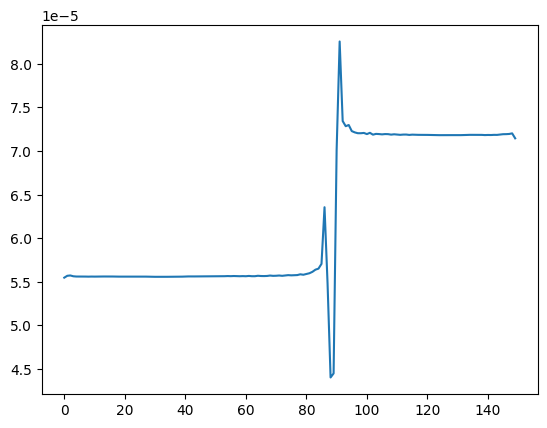

In [9]:
sp = config_dict["sim_params"]
detector_x = util.detector_x_vector(sp["detector_size"], sp["detector_pixel_size_x"])
plt.plot(wf[0])
print(wf[0])
print(detector_x)

## History

To see the interference pattern in empty space, we can record slices throughout the simulation and then plot them. `run_single_simulation` takes an optional argument `history_dz` defining the resolution with which we record the history.

Note that the history is not necessarily recorded with a constant z-spacing. Inside gratings and samples, one slice is recorded for every step. The history also records a list of z-coordinates at which the slices were recorded, which we can use for plotting.

In [ ]:
multisim.run_single_simulation(sim_path, 1, scratch_dir, save_keypoints_path=None, history_dz=0.02)

In [ ]:
# Path to the directory for the source with index 1
source_dir = multisim.get_sub_dir(sim_path, 1)

hist_x = np.load(source_dir / "history_x.npy")
hist_z = np.load(source_dir / "history_z.npy")
hist = np.load(source_dir / "history.npy")
plt.pcolormesh(
    hist_z,
    hist_x,
    hist,
    cmap="Greys_r",
    vmin=0,
    vmax=1e-6,
    shading="nearest",
)
plt.xlabel("z (m)")
plt.ylabel("x (m)")